In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
manhattan = pd.read_csv(f'E:/Vlad/pythonProject/manhattan.csv', sep=';')
bronx = pd.read_csv(f'E:/Vlad/pythonProject/bronx.csv', sep=';')
brooklyn = pd.read_csv(f'E:/Vlad/pythonProject/brooklyn.csv', sep=';')
queens = pd.read_csv(f'E:/Vlad/pythonProject/queens.csv', sep=';')
statenisland = pd.read_csv(f'E:/Vlad/pythonProject/statenisland.csv', sep=';')

In [3]:
missing_data = manhattan.isnull().sum()
print(missing_data)

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                 51
BLOCK                                 0
LOT                                   0
EASEMENT                          16997
BUILDING CLASS AT PRESENT            51
ADDRESS                               0
APARTMENT NUMBER                   8994
ZIP CODE                              0
RESIDENTIAL UNITS                  8018
COMMERCIAL UNITS                  14859
TOTAL UNITS                        7414
LAND SQUARE FEET                  15463
GROSS SQUARE FEET                 15463
YEAR BUILT                         1640
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64


In [4]:
summary_statistics = manhattan.describe()
print("Попередня статистична оцінка даних:")
print(summary_statistics)

Попередня статистична оцінка даних:
       BOROUGH         BLOCK           LOT  EASEMENT      ZIP CODE  \
count  16997.0  16997.000000  16997.000000       0.0  16997.000000   
mean       1.0   1108.569689    740.825087       NaN  10031.054127   
std        0.0    548.806953    863.575737       NaN     41.658300   
min        1.0      5.000000      1.000000       NaN  10001.000000   
25%        1.0    744.000000     29.000000       NaN  10013.000000   
50%        1.0   1171.000000   1004.000000       NaN  10022.000000   
75%        1.0   1471.000000   1202.000000       NaN  10028.000000   
max        1.0   2250.000000   9079.000000       NaN  10463.000000   

       RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
count        8979.000000       2138.000000  9583.000000       1534.000000   
mean            7.404722          2.299813     7.451111       7266.361147   
std            39.828555         14.762712    39.414064      29835.955033   
min             0.000000 

In [9]:
def assign_color(tax_type):
    if tax_type in tax_colors:
        return tax_colors[tax_type]
    
    new_color = color_palette[len(tax_colors) % len(color_palette)]
    tax_colors[tax_type] = new_color
    return new_color

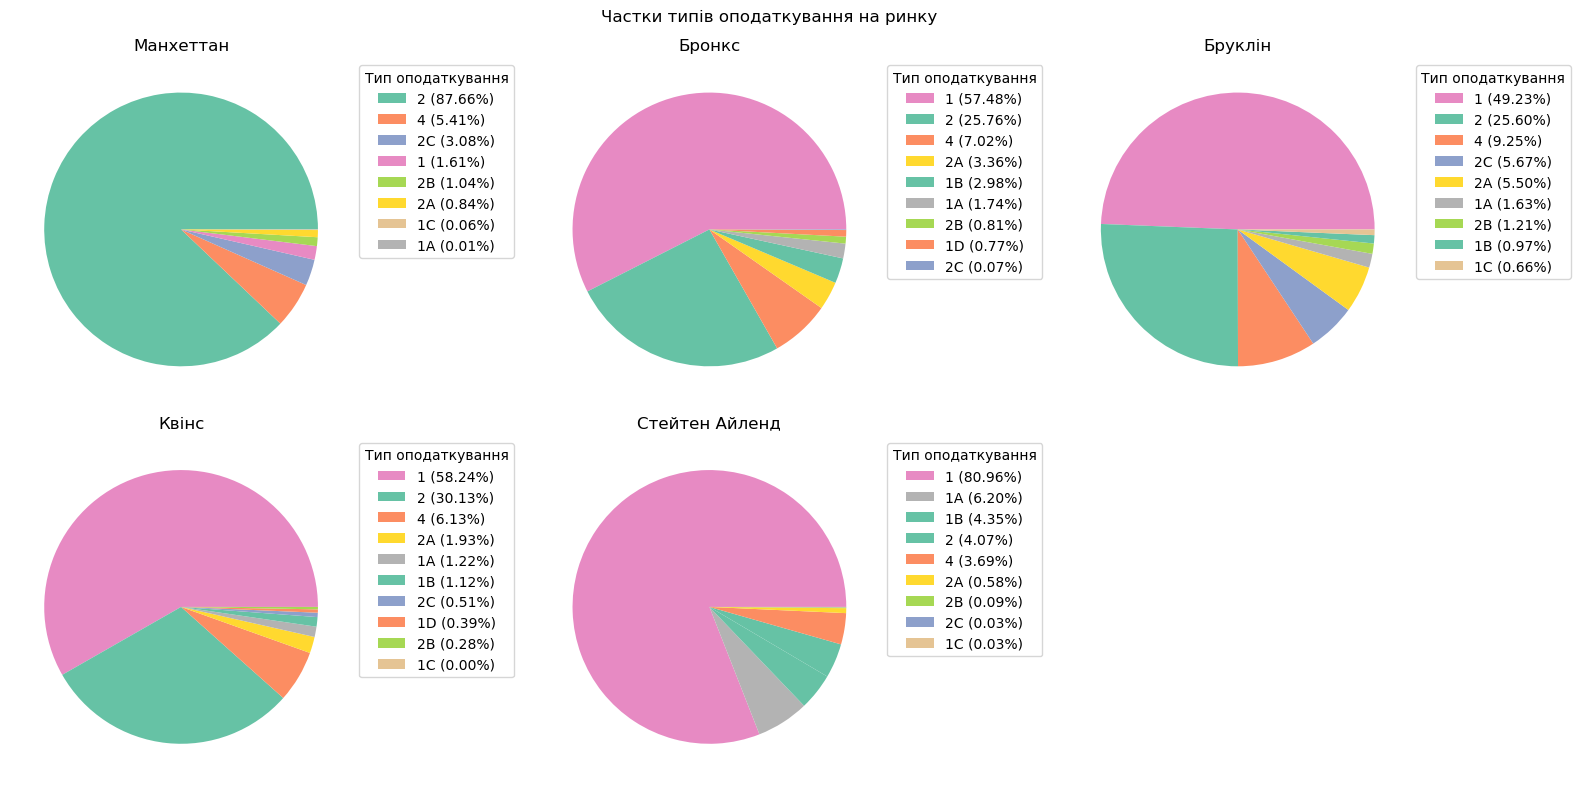

In [11]:
tax_colors = {}
color_palette = sb.color_palette("Set2")
def create_tax_pie_chart(data, title):
    tax_counts = data['TAX CLASS AT PRESENT'].dropna().value_counts()
    total_objects = len(data)
    
    tax_ratios = (tax_counts * 100 / total_objects).reset_index()
    tax_ratios.columns = ['TAX CLASS AT PRESENT', 'Частка']
    labels = [f"{label} ({percent:.2f}%)" for label, percent in zip(tax_ratios['TAX CLASS AT PRESENT'], tax_ratios['Частка'])]

    colors = [assign_color(tax_type) for tax_type in tax_ratios['TAX CLASS AT PRESENT']]

    plt.pie(
        tax_ratios['Частка'],
        colors=colors,
        textprops={'fontsize': 14}
    )
    plt.legend(labels, title='Тип оподаткування', loc='upper left', bbox_to_anchor=(1, 1))
    plt.title(title)

plt.figure(figsize=(16, 8))
plt.suptitle(f'Частки типів оподаткування на ринку')


plt.subplot(231)
create_tax_pie_chart(manhattan, 'Манхеттан')

plt.subplot(232)
create_tax_pie_chart(bronx, 'Бронкс')

plt.subplot(233)
create_tax_pie_chart(brooklyn, 'Бруклін')

plt.subplot(234)
create_tax_pie_chart(queens, 'Квінс')

plt.subplot(235)
create_tax_pie_chart(statenisland, 'Стейтен Айленд')

plt.tight_layout()
plt.show()


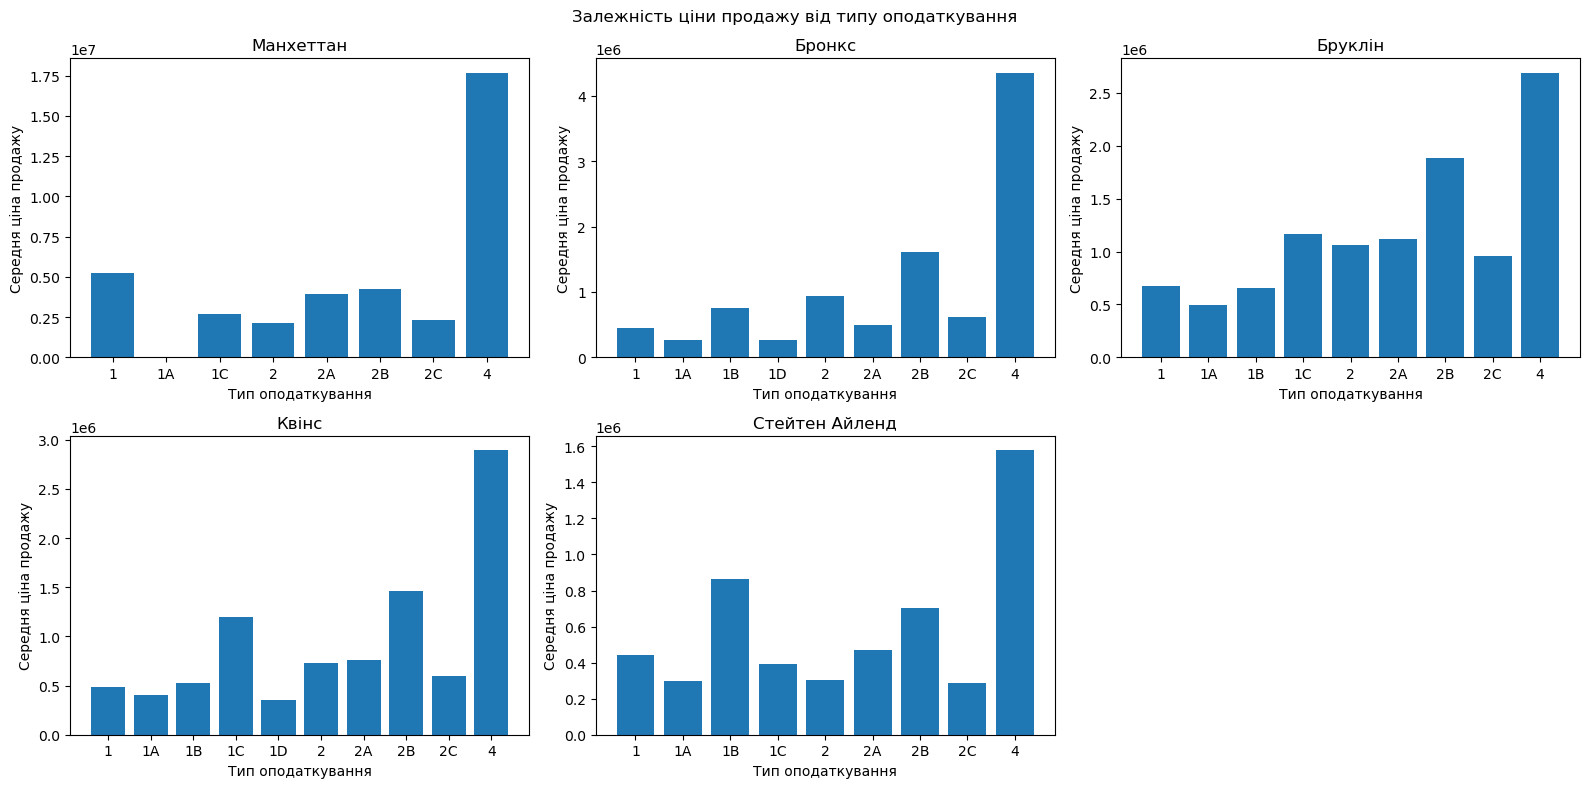

In [70]:
def create_tax_bar_chart(data, title):
    grouped_data = data.groupby('TAX CLASS AT PRESENT')['SALE PRICE'].mean().reset_index()
    plt.bar(grouped_data['TAX CLASS AT PRESENT'], grouped_data['SALE PRICE'])
    plt.xlabel('Тип оподаткування')
    plt.ylabel('Середня ціна продажу')
    plt.title(title)
    

plt.figure(figsize=(16, 8))
plt.suptitle(f'Залежність ціни продажу від типу оподаткування')

plt.subplot(231)
create_tax_bar_chart(manhattan, 'Манхеттан')

plt.subplot(232)
create_tax_bar_chart(bronx, 'Бронкс')

plt.subplot(233)
create_tax_bar_chart(brooklyn, 'Бруклін')

plt.subplot(234)
create_tax_bar_chart(queens, 'Квінс')

plt.subplot(235)
create_tax_bar_chart(statenisland, 'Стейтен Айленд')

plt.tight_layout()
plt.show()

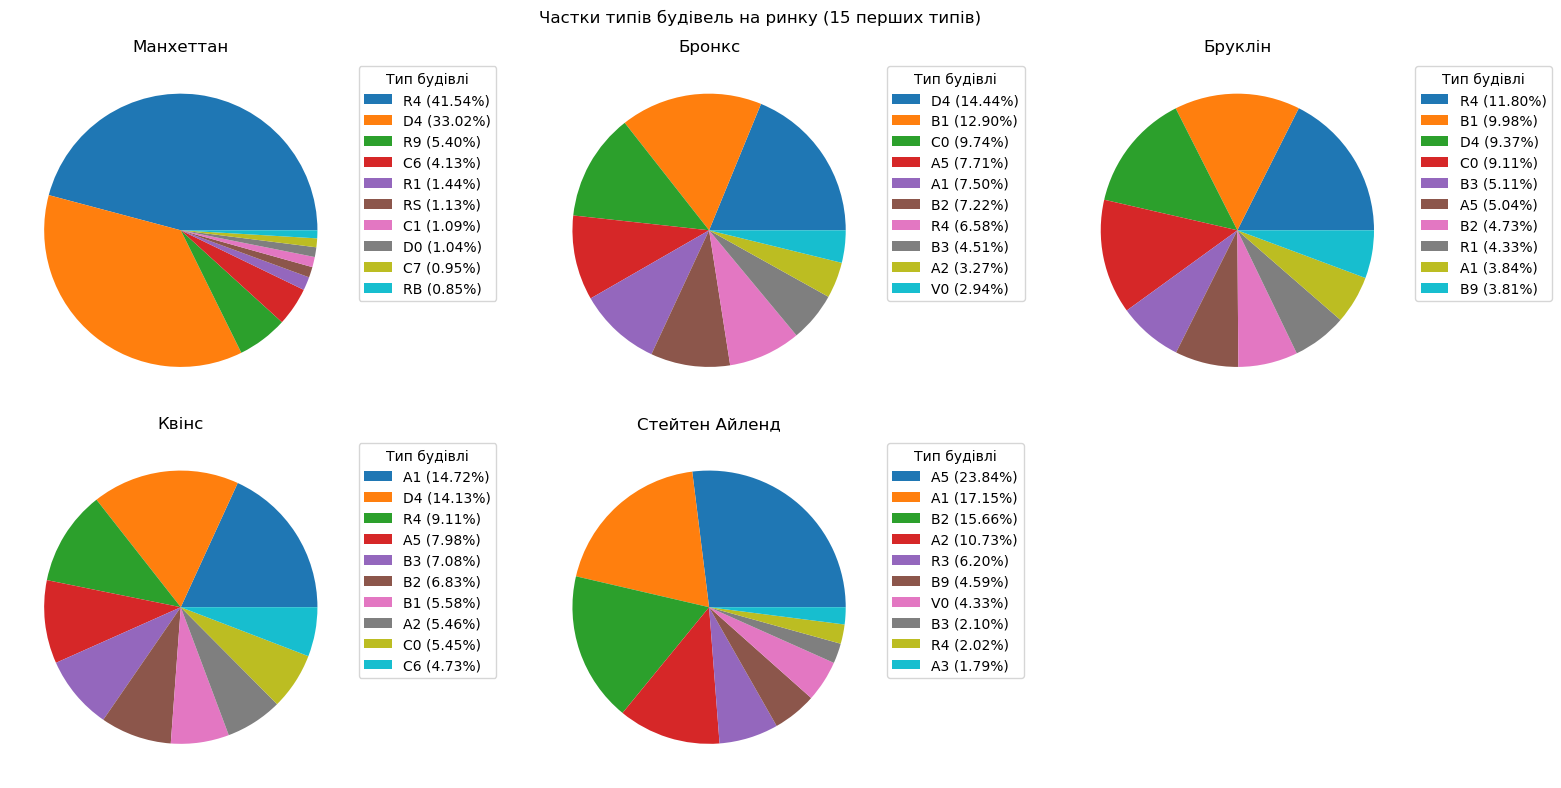

In [12]:
def create_class_pie_chart(data, title):

    tax_counts = data['BUILDING CLASS AT PRESENT'].dropna().value_counts()
    total_objects = len(data)
    tax_ratios = (tax_counts *100 / total_objects).reset_index()
    
    tax_ratios.columns = ['BUILDING CLASS AT PRESENT', 'Частка']
    
    
    labels = [f"{label} ({percent:.2f}%)" for label, percent in zip(tax_ratios.head(10)['BUILDING CLASS AT PRESENT'], tax_ratios.head(10)['Частка'])]

    plt.pie(
        tax_ratios.head(10)['Частка'],  
        textprops={'fontsize': 14}
    )
    plt.legend(labels, title='Тип будівлі', loc='upper left', bbox_to_anchor=(1, 1))
    plt.title(title)
    
plt.figure(figsize=(16, 8))
plt.suptitle(f'Частки типів будівель на ринку (15 перших типів)')

plt.subplot(231)
create_class_pie_chart(manhattan, 'Манхеттан')

plt.subplot(232)
create_class_pie_chart(bronx, 'Бронкс')

plt.subplot(233)
create_class_pie_chart(brooklyn, 'Бруклін')

plt.subplot(234)
create_class_pie_chart(queens, 'Квінс')

plt.subplot(235)
create_class_pie_chart(statenisland, 'Стейтен Айленд')

plt.tight_layout()
plt.show()   

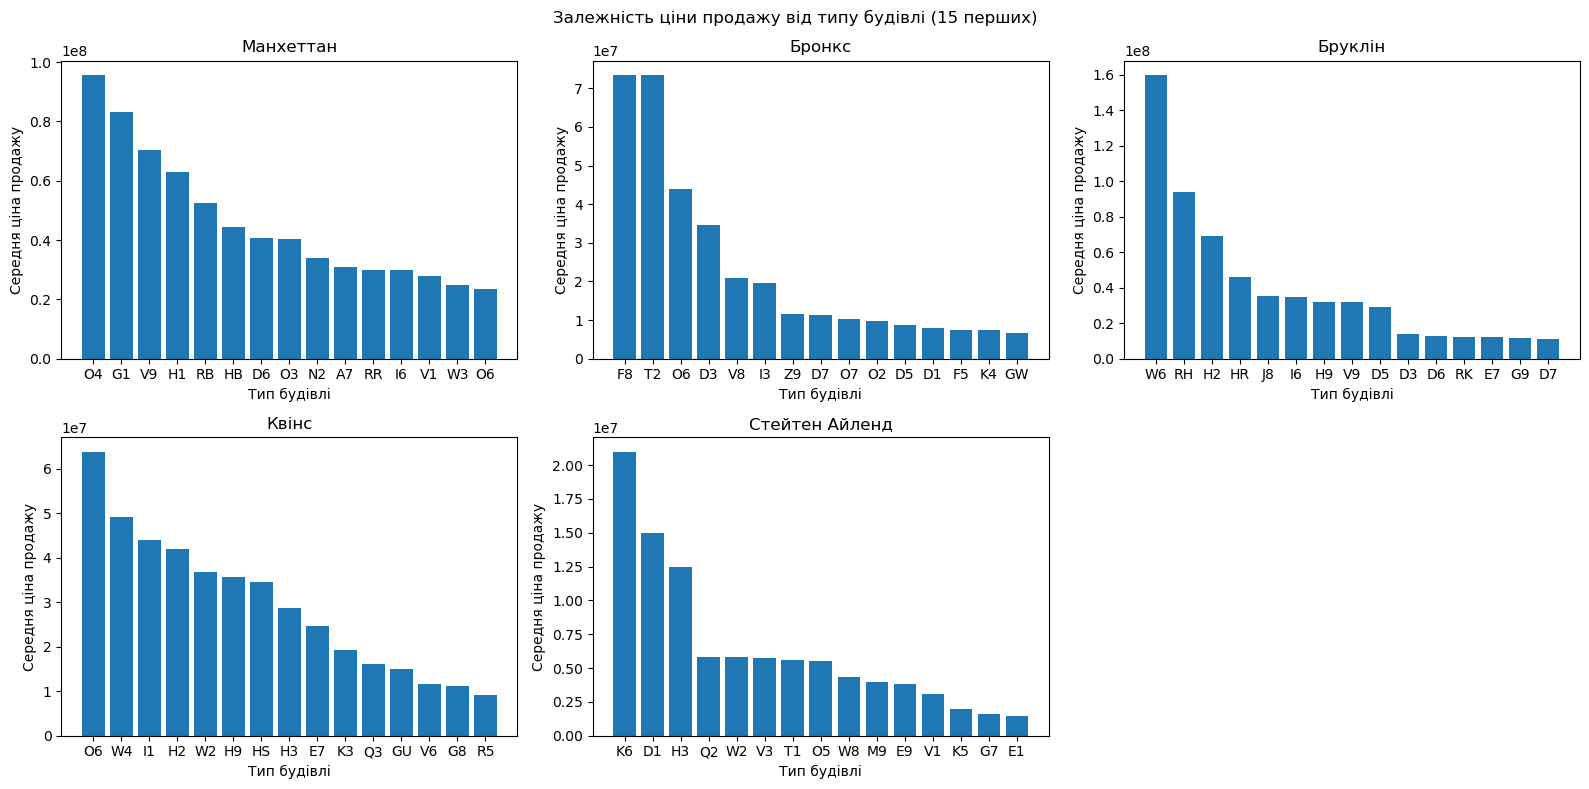

In [72]:
def create_class_bar_chart(data, title):
    grouped_data = data.groupby('BUILDING CLASS AT PRESENT')['SALE PRICE'].mean().reset_index()
    grouped_data = grouped_data.sort_values(by='SALE PRICE', ascending=[False] ).head(15)

    plt.bar(grouped_data['BUILDING CLASS AT PRESENT'], grouped_data['SALE PRICE'])
    plt.xlabel('Тип будівлі')
    plt.ylabel('Середня ціна продажу')
    plt.title(title)
    
plt.figure(figsize=(16, 8))
plt.suptitle(f'Залежність ціни продажу від типу будівлі (15 перших)')

plt.subplot(231)
create_class_bar_chart(manhattan, 'Манхеттан')

plt.subplot(232)
create_class_bar_chart(bronx, 'Бронкс')

plt.subplot(233)
create_class_bar_chart(brooklyn, 'Бруклін')

plt.subplot(234)
create_class_bar_chart(queens, 'Квінс')

plt.subplot(235)
create_class_bar_chart(statenisland, 'Стейтен Айленд')

plt.tight_layout()
plt.show()


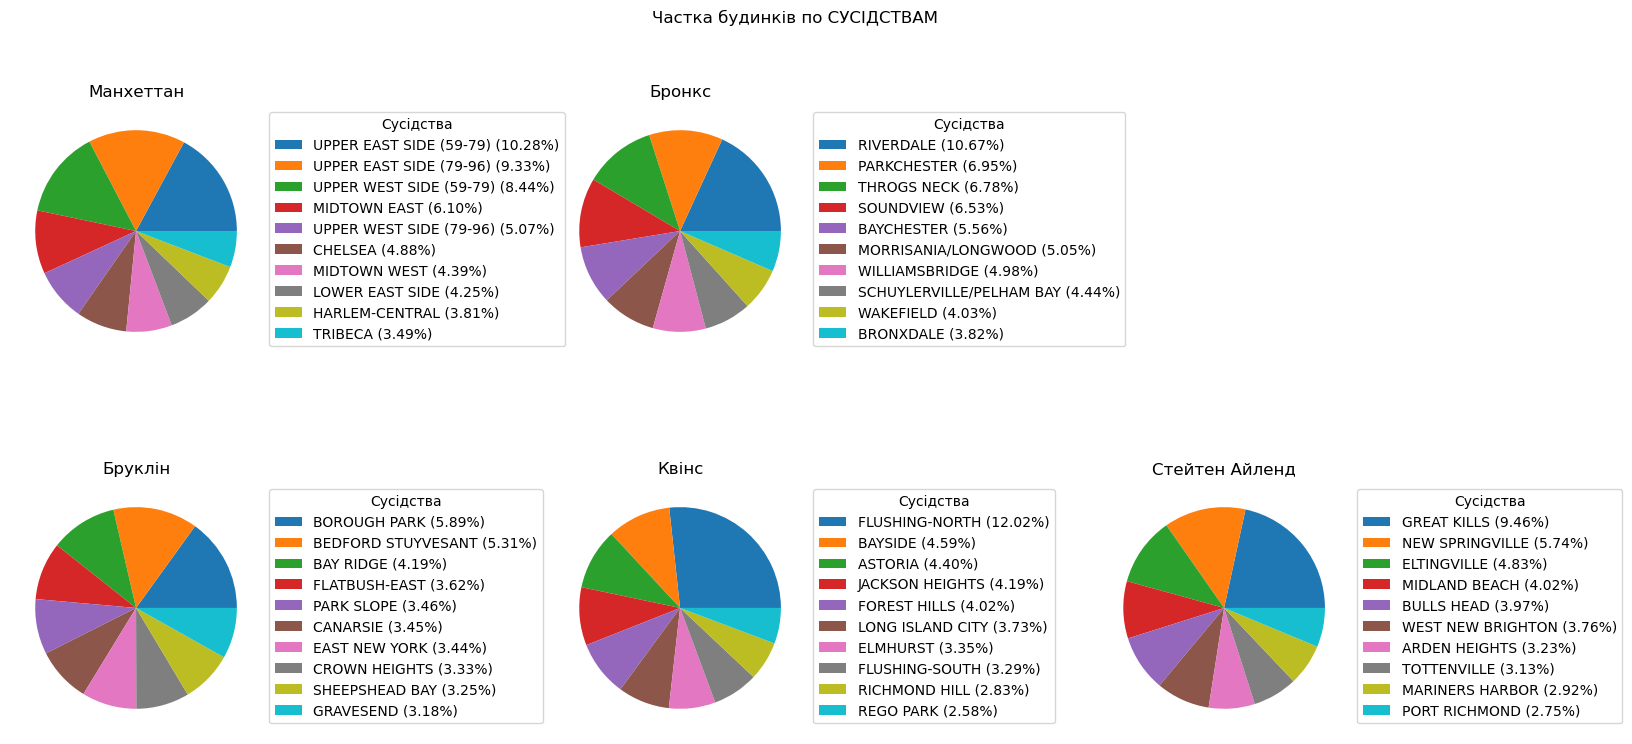

In [73]:
def create_neighborhood_pie_chart(data, title):
    
    neighborhood_counts = data['NEIGHBORHOOD'].value_counts()
    total_houses = len(data)
    neighborhood_ratios = (neighborhood_counts *100 / total_houses).reset_index()
    neighborhood_ratios.columns = ['NEIGHBORHOOD', 'Частка']

    data_for_plot = neighborhood_ratios.sort_values(by='Частка', ascending=False)
    
    plt.pie(
        data_for_plot.head(10)['Частка'], 
        textprops={'fontsize': 14}
        )
    
    labels = [f"{label} ({percent:.2f}%)" 
              for label, percent in zip(
                  data_for_plot.head(10)['NEIGHBORHOOD'], data_for_plot.head(10)['Частка']
              )]
    plt.legend(labels, title='Сусідства', loc='upper left', bbox_to_anchor=(1, 1))
    plt.title(title)
    
    
plt.figure(figsize=(16, 8))
plt.suptitle(f'Частка будинків по СУСІДСТВАМ')

plt.subplot(231)
create_neighborhood_pie_chart(manhattan, 'Манхеттан')

plt.subplot(232)
create_neighborhood_pie_chart(bronx, 'Бронкс')

plt.subplot(234)
create_neighborhood_pie_chart(brooklyn, 'Бруклін')

plt.subplot(235)
create_neighborhood_pie_chart(queens, 'Квінс')

plt.subplot(236)
create_neighborhood_pie_chart(statenisland, 'Стейтен Айленд')

plt.tight_layout()
   
plt.show()

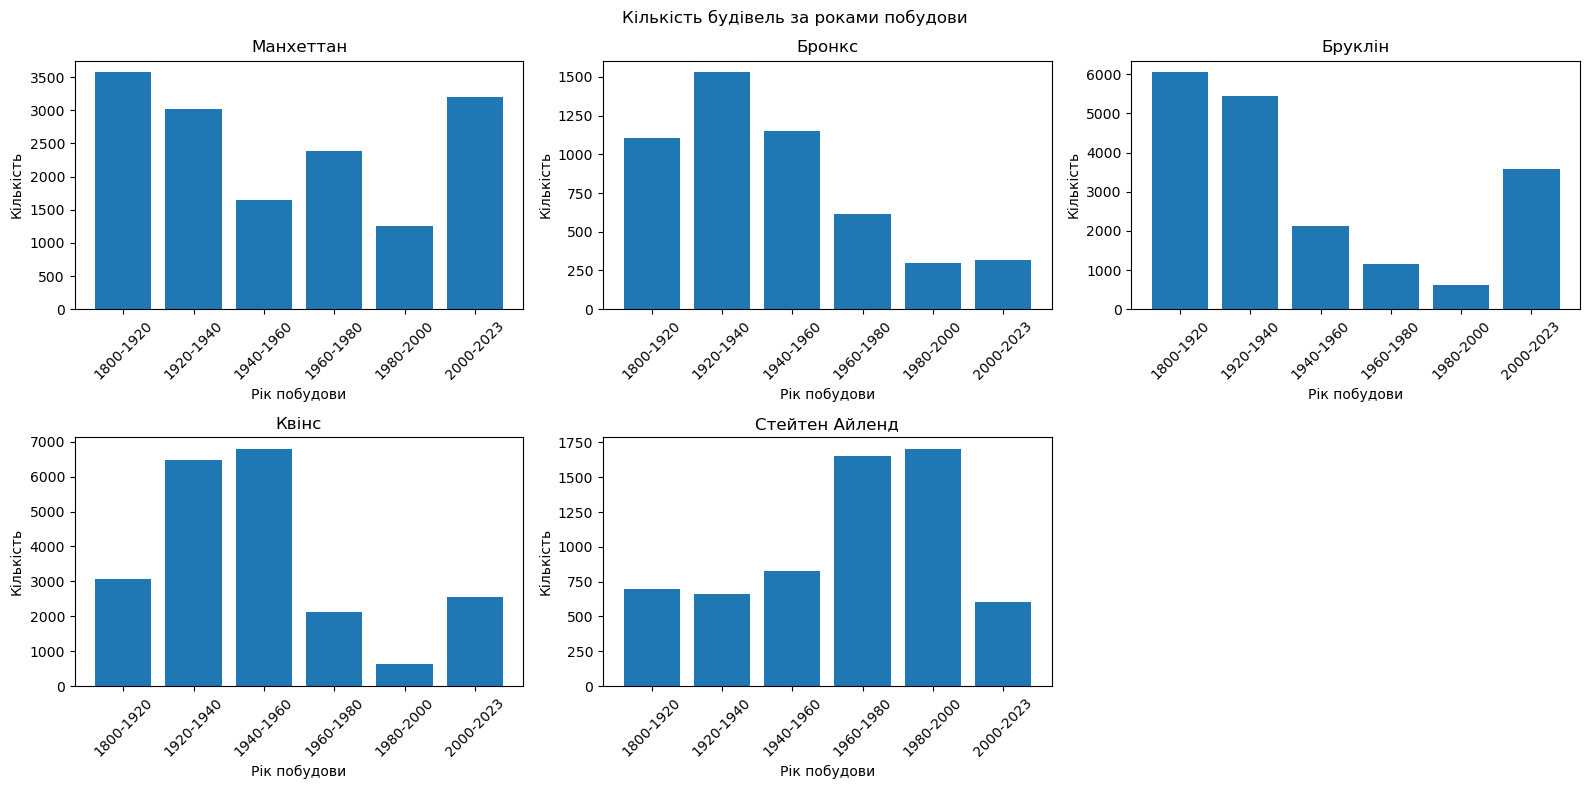

In [74]:
def create_year_bar_chart(data, title):
    data = data[['YEAR BUILT']].dropna()
    data = data[(data['YEAR BUILT'] >= 1800) & (data['YEAR BUILT'] <= 2023)]  # Обмеження рокового діапазону

    bins = [1800, 1920, 1940, 1960, 1980, 2000, 2020]
    labels = ['1800-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2023']
    data['YEAR GROUP'] = pd.cut(data['YEAR BUILT'], bins=bins, labels=labels)

    year_counts = data['YEAR GROUP'].value_counts().reset_index()
    year_counts.columns = ['YEAR GROUP', 'Кількість']
    year_counts = year_counts.sort_values(by='YEAR GROUP')

    plt.bar(year_counts['YEAR GROUP'], year_counts['Кількість'])
    plt.title(title)
    plt.xlabel('Рік побудови')
    plt.xticks(rotation=45)
    plt.ylabel('Кількість')
    
plt.figure(figsize=(16, 8))
plt.suptitle(f'Кількість будівель за роками побудови')

plt.subplot(231)
create_year_bar_chart(manhattan, 'Манхеттан')

plt.subplot(232)
create_year_bar_chart(bronx, 'Бронкс')

plt.subplot(233)
create_year_bar_chart(brooklyn, 'Бруклін')

plt.subplot(234)
create_year_bar_chart(queens, 'Квінс')

plt.subplot(235)
create_year_bar_chart(statenisland, 'Стейтен Айленд')

plt.tight_layout()
plt.show()

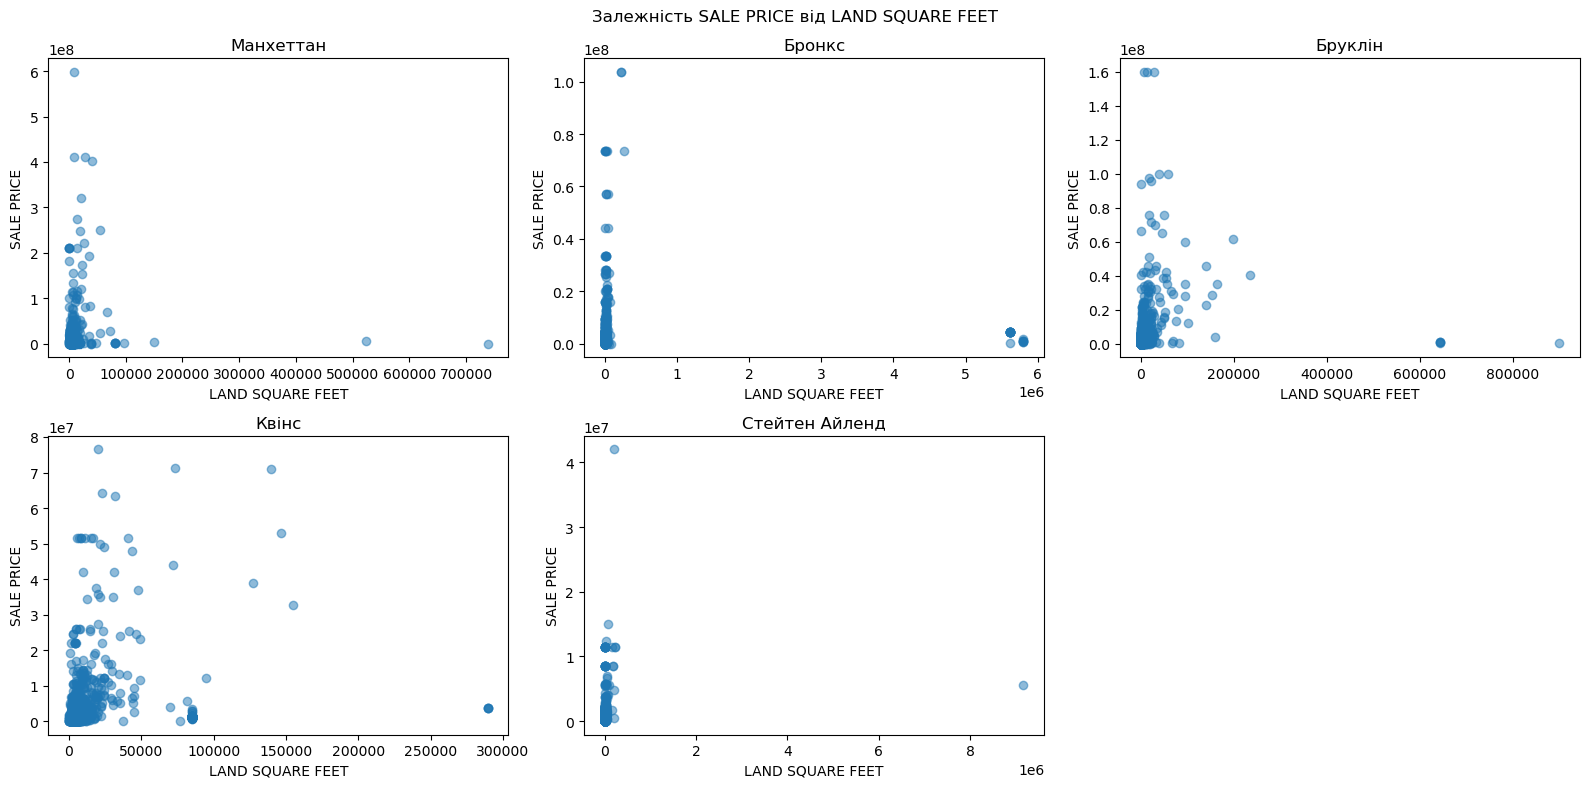

In [75]:
def create_dep_LQF_scatter_chart(data, title):

    filtered_data = data[['LAND SQUARE FEET', 'SALE PRICE']].dropna()
    filtered_data = filtered_data[filtered_data['SALE PRICE'] > 1]
    
    plt.scatter(filtered_data['LAND SQUARE FEET'], filtered_data['SALE PRICE'], alpha=0.5)
    plt.title(title)
    plt.xlabel('LAND SQUARE FEET')
    plt.ylabel('SALE PRICE')

plt.figure(figsize=(16, 8))
plt.suptitle(f'Залежність SALE PRICE від LAND SQUARE FEET')

plt.subplot(231)
create_dep_LQF_scatter_chart(manhattan, 'Манхеттан')

plt.subplot(232)
create_dep_LQF_scatter_chart(bronx, 'Бронкс')

plt.subplot(233)
create_dep_LQF_scatter_chart(brooklyn, 'Бруклін')

plt.subplot(234)
create_dep_LQF_scatter_chart(queens, 'Квінс')

plt.subplot(235)
create_dep_LQF_scatter_chart(statenisland, 'Стейтен Айленд')

plt.tight_layout()
plt.show()

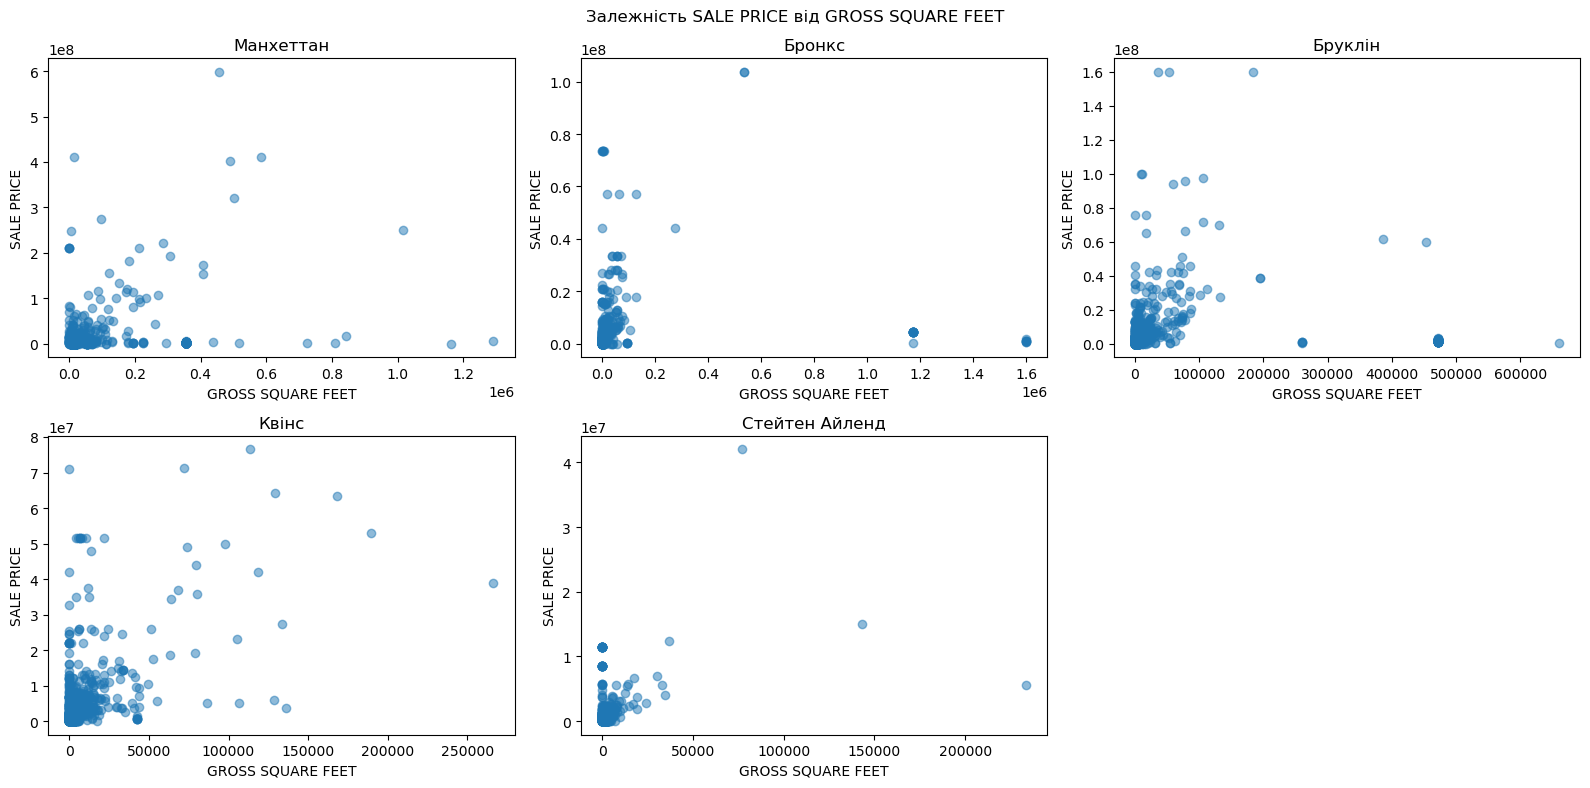

In [76]:
def create_dep_GQF_scatter_chart(data, title):

    filtered_data = data[['GROSS SQUARE FEET', 'SALE PRICE']].dropna()
    filtered_data = filtered_data[filtered_data['SALE PRICE'] > 1]
    
    plt.scatter(filtered_data['GROSS SQUARE FEET'], filtered_data['SALE PRICE'], alpha=0.5)
    plt.title(title)
    plt.xlabel('GROSS SQUARE FEET')
    plt.ylabel('SALE PRICE')

plt.figure(figsize=(16, 8))
plt.suptitle(f'Залежність SALE PRICE від GROSS SQUARE FEET')

plt.subplot(231)
create_dep_GQF_scatter_chart(manhattan, 'Манхеттан')

plt.subplot(232)
create_dep_GQF_scatter_chart(bronx, 'Бронкс')

plt.subplot(233)
create_dep_GQF_scatter_chart(brooklyn, 'Бруклін')

plt.subplot(234)
create_dep_GQF_scatter_chart(queens, 'Квінс')

plt.subplot(235)
create_dep_GQF_scatter_chart(statenisland, 'Стейтен Айленд')

plt.tight_layout()
plt.show()


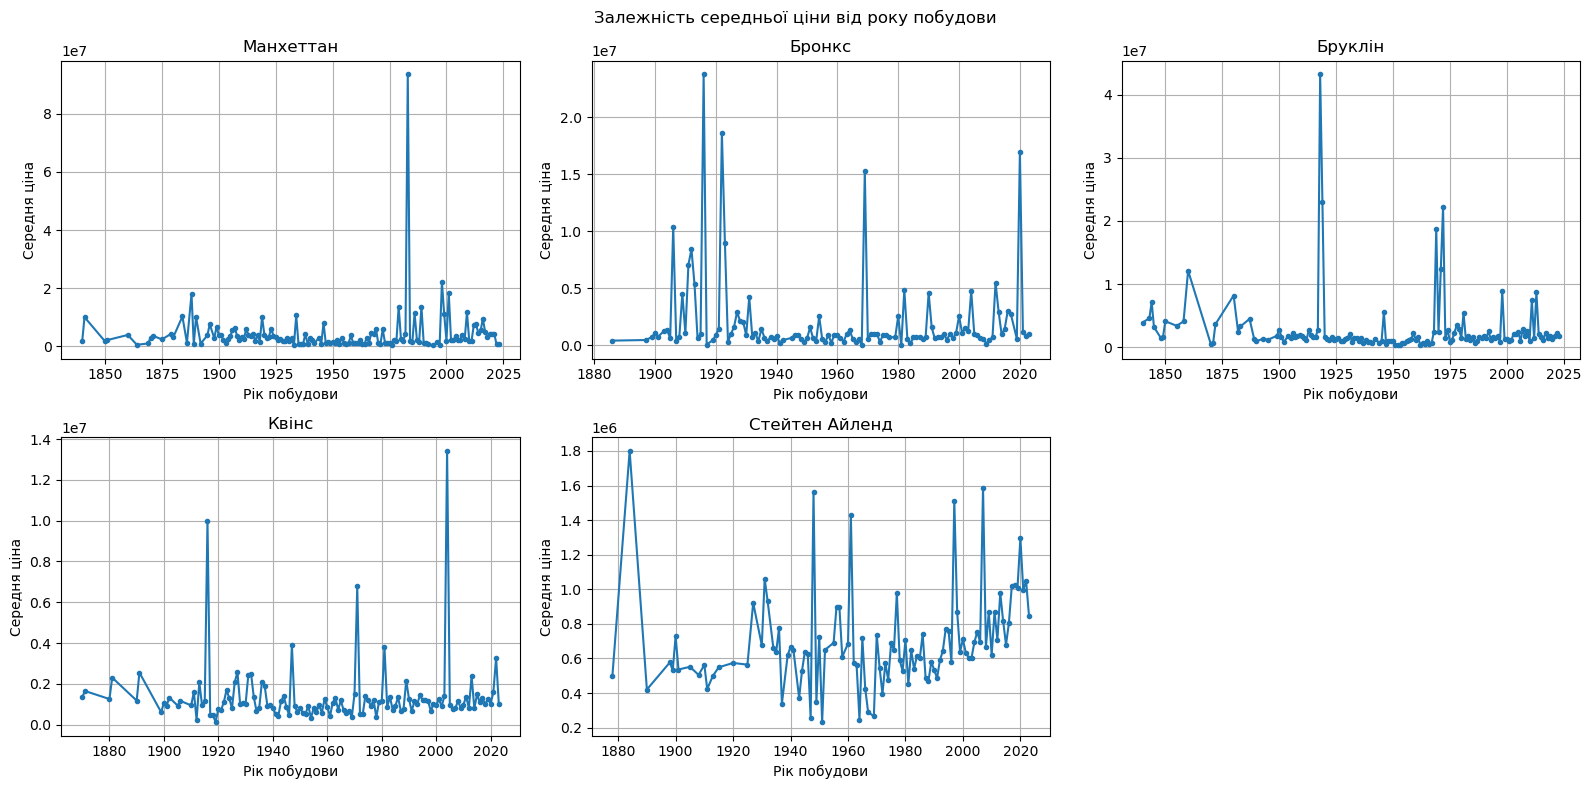

In [77]:
def create_dep_year_price_plot_chart(data, title):   
    data = data[['YEAR BUILT', 'SALE PRICE']].dropna()
    data = data[(data['YEAR BUILT'] >= 1840) & (data['YEAR BUILT'] <= 2023) & (data['SALE PRICE'] > 1)] 
    
    average_prices_by_year = data.groupby('YEAR BUILT')['SALE PRICE'].mean().reset_index()

    plt.plot(average_prices_by_year['YEAR BUILT'], average_prices_by_year['SALE PRICE'], marker='.')
    plt.title(title)
    plt.xlabel('Рік побудови')
    plt.ylabel('Середня ціна')
    plt.grid(True)

plt.figure(figsize=(16, 8))
plt.suptitle(f'Залежність середньої ціни від року побудови')

plt.subplot(231)
create_dep_year_price_plot_chart(manhattan, 'Манхеттан')

plt.subplot(232)
create_dep_year_price_plot_chart(bronx, 'Бронкс')

plt.subplot(233)
create_dep_year_price_plot_chart(brooklyn, 'Бруклін')

plt.subplot(234)
create_dep_year_price_plot_chart(queens, 'Квінс')

plt.subplot(235)
create_dep_year_price_plot_chart(statenisland, 'Стейтен Айленд')

plt.tight_layout()
plt.show()


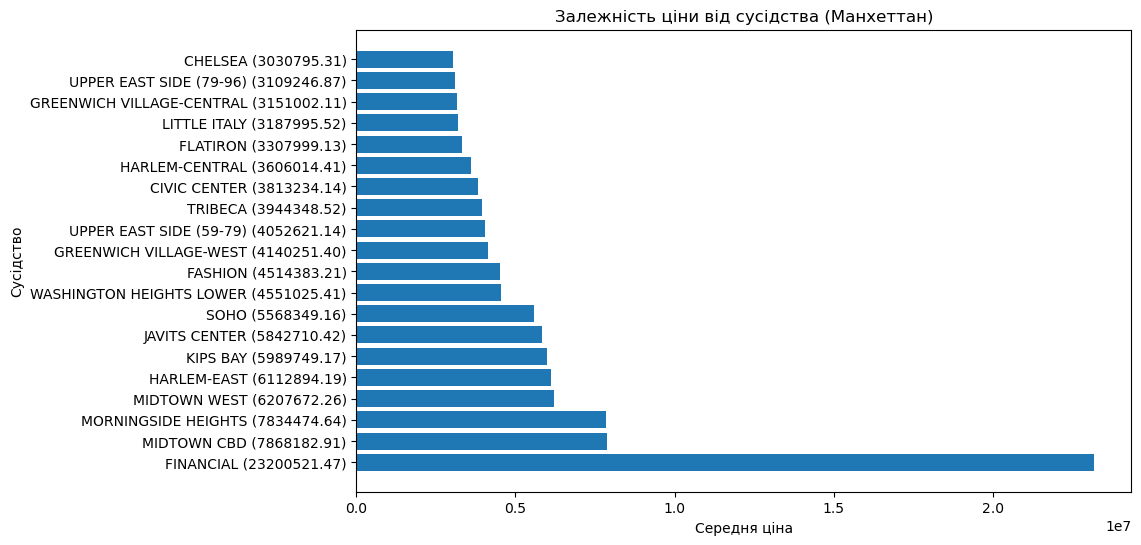

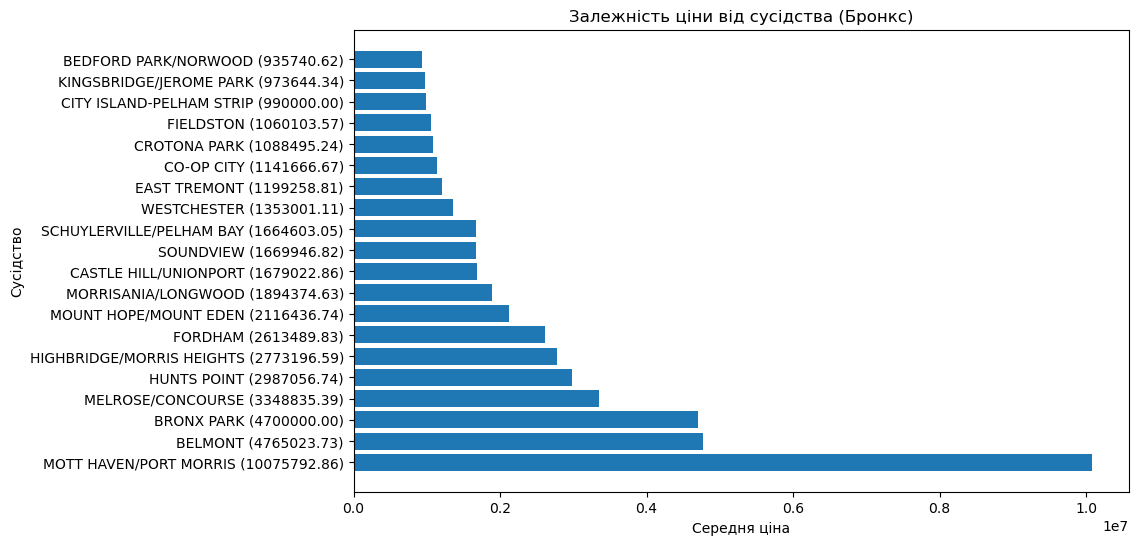

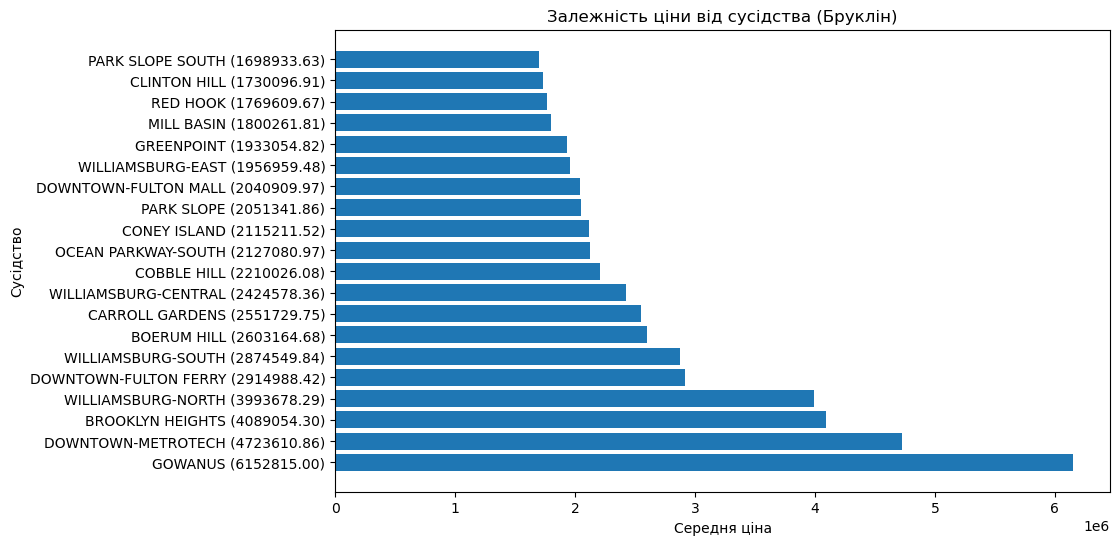

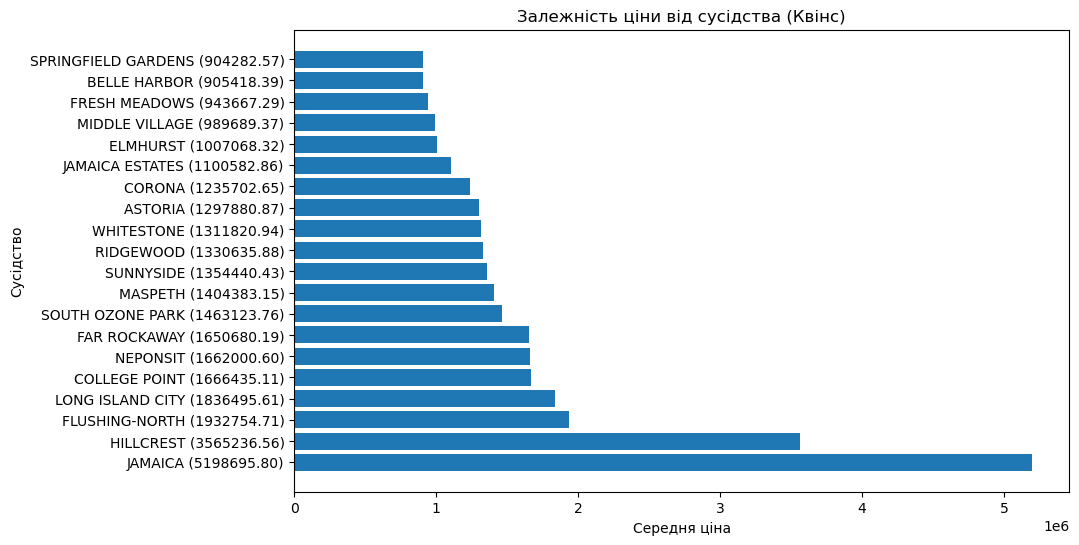

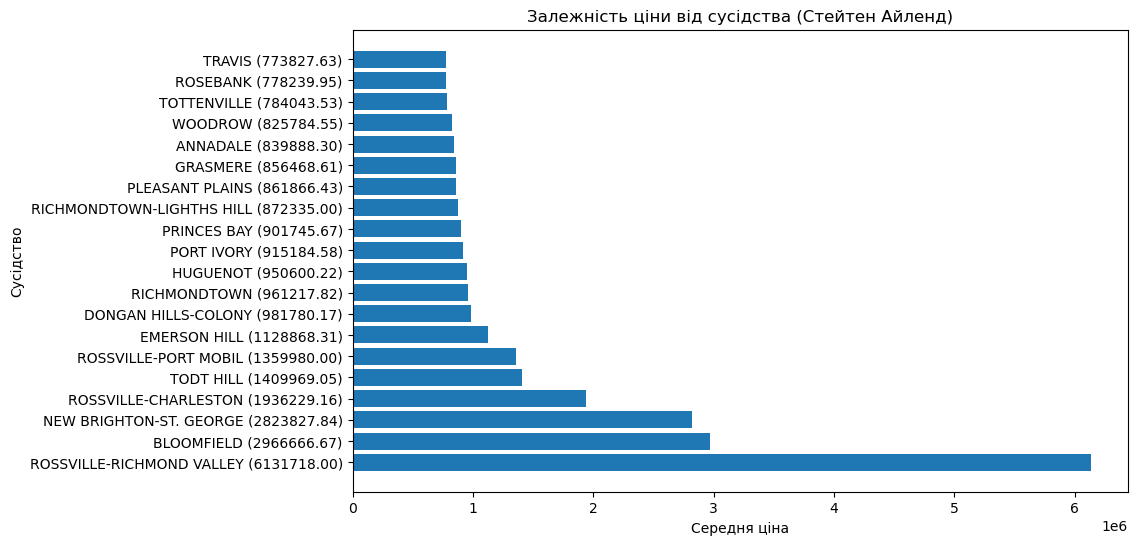

In [78]:
def create_dep_neib_price_barh_chart(data, title):
    neighborhood_prices = data[['NEIGHBORHOOD', 'SALE PRICE']].dropna()
    neighborhood_prices = neighborhood_prices[(neighborhood_prices['SALE PRICE'] > 1)] 
    neighborhood_prices = neighborhood_prices.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().reset_index()


    neighborhood_prices = neighborhood_prices.sort_values(by='SALE PRICE', ascending=False)

    neighborhoods = neighborhood_prices.head(20)['NEIGHBORHOOD']
    prices = neighborhood_prices.head(20)['SALE PRICE']
    
    plt.figure(figsize=(10, 6))
    labels = [f'{neighborhood} ({price:.2f})' for neighborhood, price in zip(neighborhoods, prices)]

    plt.barh(labels, neighborhood_prices.head(20)['SALE PRICE'])
    plt.xlabel('Середня ціна')
    plt.ylabel('Сусідство')

    plt.title(f'Залежність ціни від сусідства ({title})')
    plt.show()
    
create_dep_neib_price_barh_chart(manhattan, 'Манхеттан')
create_dep_neib_price_barh_chart(bronx, 'Бронкс')
create_dep_neib_price_barh_chart(brooklyn, 'Бруклін')
create_dep_neib_price_barh_chart(queens, 'Квінс')
create_dep_neib_price_barh_chart(statenisland, 'Стейтен Айленд')


In [90]:
correlation_df = pd.DataFrame(columns=['Variable', 'Correlation', 'Location'])
def cors(data, title):
    data = data[['SALE PRICE', 
                 'TOTAL UNITS','COMMERCIAL UNITS', 
                 'RESIDENTIAL UNITS', 'LAND SQUARE FEET', 
                 'GROSS SQUARE FEET', 'YEAR BUILT',
                 'NEIGHBORHOOD'
                ]].dropna()
    data = data[data['SALE PRICE']>1]
    correlation_price_land_square_feet = data['SALE PRICE'].corr(data['LAND SQUARE FEET'])
    correlation_price_gross_square_feet = data['SALE PRICE'].corr(data['GROSS SQUARE FEET'])
    correlation_price_year_built = data['SALE PRICE'].corr(data['YEAR BUILT'])
    correlation_price_total_units = data['SALE PRICE'].corr(data['TOTAL UNITS'])
    correlation_price_com_units = data['SALE PRICE'].corr(data['COMMERCIAL UNITS'])
    correlation_price_res_units = data['SALE PRICE'].corr(data['RESIDENTIAL UNITS'])
    
    correlation_df.loc[len(correlation_df)] = ['Price vs Land Square Feet', correlation_price_land_square_feet, title]
    correlation_df.loc[len(correlation_df)] = ['Price vs Gross Square Feet', correlation_price_gross_square_feet, title]
    correlation_df.loc[len(correlation_df)] = ['Price vs Year Built', correlation_price_year_built, title]
    correlation_df.loc[len(correlation_df)] = ['Price vs Total Units', correlation_price_total_units, title]
    correlation_df.loc[len(correlation_df)] = ['Price vs Commercial Units', correlation_price_com_units, title]
    correlation_df.loc[len(correlation_df)] = ['Price vs Residential Units', correlation_price_res_units, title]
    
cors(manhattan, 'Манхеттан')
cors(bronx, 'Бронкс')
cors(brooklyn, 'Бруклін')
cors(queens, 'Квінс')
cors(statenisland, 'Стейтен Айленд')

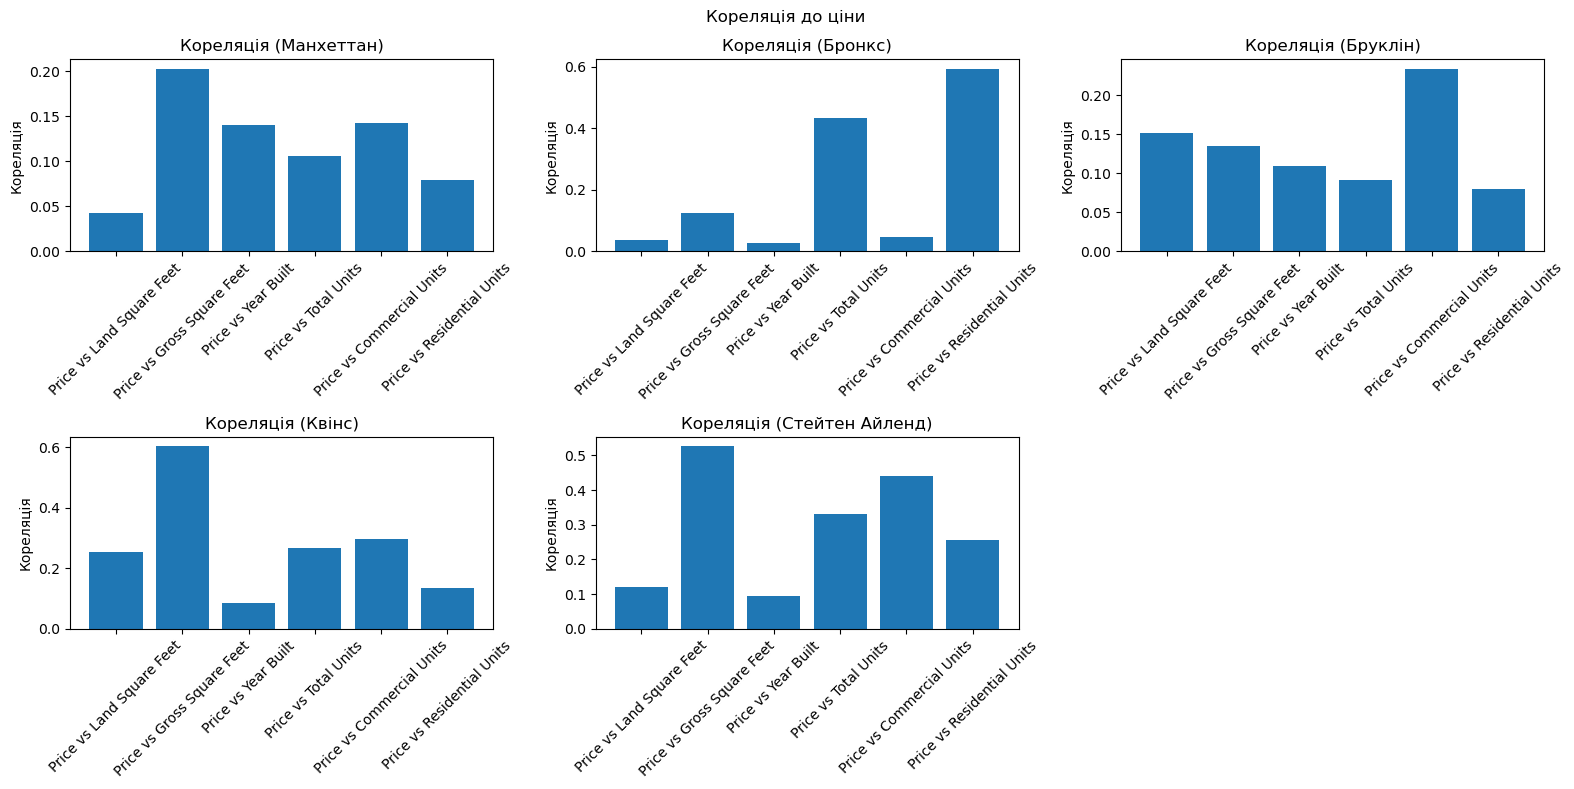

In [81]:
def get_cors_barh_charts(data):
    data_for_location = correlation_df[correlation_df['Location'] == data]
    plt.bar(data_for_location['Variable'], data_for_location['Correlation'],)
    plt.title(f'Кореляція ({data})')
    plt.ylabel('Кореляція')
    plt.xticks(rotation=45)

plt.figure(figsize=(16, 8))
locations = correlation_df['Location'].unique()
j = 0
plt.suptitle(f'Кореляція до ціни')
for i in range(231, 236):
    plt.subplot(i)
    get_cors_barh_charts(locations[j])
    j += 1
    
plt.tight_layout()

plt.show()

In [92]:
covariation_df = pd.DataFrame(columns=['Variable', 'Covariation', 'Location'])

def covs(data, title):
    data = data[['SALE PRICE', 
                 'TOTAL UNITS','COMMERCIAL UNITS', 
                 'RESIDENTIAL UNITS', 'LAND SQUARE FEET', 
                 'GROSS SQUARE FEET', 'YEAR BUILT'
                ]].dropna()
    data = data[data['SALE PRICE'] > 1]
    
    covariation_price_land_square_feet = data['SALE PRICE'].cov(data['LAND SQUARE FEET'])
    covariation_price_gross_square_feet = data['SALE PRICE'].cov(data['GROSS SQUARE FEET'])
    covariation_price_year_built = data['SALE PRICE'].cov(data['YEAR BUILT'])
    covariation_price_total_units = data['SALE PRICE'].cov(data['TOTAL UNITS'])
    covariation_price_com_units = data['SALE PRICE'].cov(data['COMMERCIAL UNITS'])
    covariation_price_res_units = data['SALE PRICE'].cov(data['RESIDENTIAL UNITS'])
    
    covariation_df.loc[len(covariation_df)] = ['Price vs Land Square Feet', covariation_price_land_square_feet, title]
    covariation_df.loc[len(covariation_df)] = ['Price vs Gross Square Feet', covariation_price_gross_square_feet, title]
    covariation_df.loc[len(covariation_df)] = ['Price vs Year Built', covariation_price_year_built, title]
    covariation_df.loc[len(covariation_df)] = ['Price vs Total Units', covariation_price_total_units, title]
    covariation_df.loc[len(covariation_df)] = ['Price vs Commercial Units', covariation_price_com_units, title]
    covariation_df.loc[len(covariation_df)] = ['Price vs Residential Units', covariation_price_res_units, title]

covs(manhattan, 'Манхеттан')
covs(bronx, 'Бронкс')
covs(brooklyn, 'Бруклін')
covs(queens, 'Квінс')
covs(statenisland, 'Стейтен Айленд')


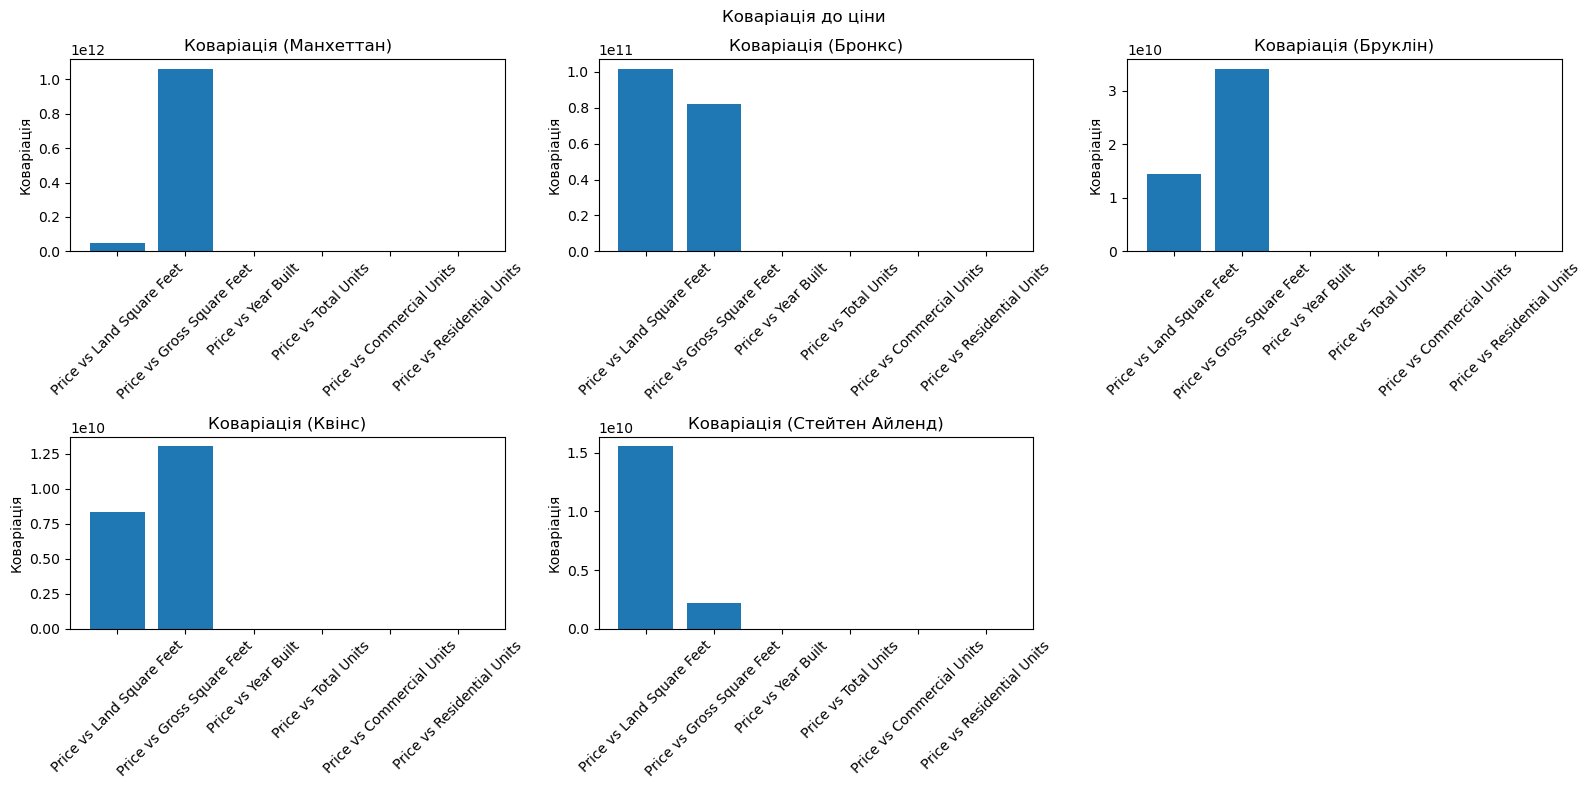

In [102]:
def get_covs_bar_charts(data):
    data_for_location = covariation_df[covariation_df['Location'] == data]
    plt.bar(data_for_location['Variable'], data_for_location['Covariation'],)
    plt.title(f'Коваріація ({data})')
    plt.ylabel('Коваріація')
    plt.xticks(rotation=45)

plt.figure(figsize=(16, 8))
locations = covariation_df['Location'].unique()
j = 0
plt.suptitle(f'Коваріація до ціни')
for i in range(231, 236):
    plt.subplot(i)
    get_covs_bar_charts(locations[j])
    j += 1
    
plt.tight_layout()

plt.show()

In [106]:
for i in range(0, len(locations)):
    cov = covariation_df[covariation_df['Location'] == locations[i]]
    print(cov)
    print('\n')

                     Variable   Covariation   Location
0   Price vs Land Square Feet  4.730151e+10  Манхеттан
1  Price vs Gross Square Feet  1.063121e+12  Манхеттан
2         Price vs Year Built  1.997932e+08  Манхеттан
3        Price vs Total Units  4.112976e+08  Манхеттан
4   Price vs Commercial Units  1.051027e+08  Манхеттан
5  Price vs Residential Units  3.061950e+08  Манхеттан


                      Variable   Covariation Location
6    Price vs Land Square Feet  1.018594e+11   Бронкс
7   Price vs Gross Square Feet  8.188309e+10   Бронкс
8          Price vs Year Built  4.154544e+06   Бронкс
9         Price vs Total Units  5.684660e+07   Бронкс
10   Price vs Commercial Units  4.728428e+06   Бронкс
11  Price vs Residential Units  5.211818e+07   Бронкс


                      Variable   Covariation Location
12   Price vs Land Square Feet  1.445327e+10  Бруклін
13  Price vs Gross Square Feet  3.417187e+10  Бруклін
14         Price vs Year Built  1.809609e+07  Бруклін
15        Price v

In [107]:
variance_df = pd.DataFrame(columns=['Variable', 'Variance', 'Location'])

# Функція для обчислення дисперсії та додавання результатів до датафрейму
def variances(data, title):
    data = data[['SALE PRICE', 
                 'TOTAL UNITS','COMMERCIAL UNITS', 
                 'RESIDENTIAL UNITS', 'LAND SQUARE FEET', 
                 'GROSS SQUARE FEET', 'YEAR BUILT'
                ]].dropna()
    data = data[data['SALE PRICE'] > 1]
    
    variance_price = data['SALE PRICE'].var()
    variance_land_square_feet = data['LAND SQUARE FEET'].var()
    variance_gross_square_feet = data['GROSS SQUARE FEET'].var()
    variance_year_built = data['YEAR BUILT'].var()
    variance_total_units = data['TOTAL UNITS'].var()
    variance_com_units = data['COMMERCIAL UNITS'].var()
    variance_res_units = data['RESIDENTIAL UNITS'].var()
    
    variance_df.loc[len(variance_df)] = ['Price', variance_price, title]
    variance_df.loc[len(variance_df)] = ['Land Square Feet', variance_land_square_feet, title]
    variance_df.loc[len(variance_df)] = ['Gross Square Feet', variance_gross_square_feet, title]
    variance_df.loc[len(variance_df)] = ['Year Built', variance_year_built, title]
    variance_df.loc[len(variance_df)] = ['Total Units', variance_total_units, title]
    variance_df.loc[len(variance_df)] = ['Commercial Units', variance_com_units, title]
    variance_df.loc[len(variance_df)] = ['Residential Units', variance_res_units, title]

# Викликаємо функції для обчислення дисперсії для різних районів
variances(manhattan, 'Манхеттан')
variances(bronx, 'Бронкс')
variances(brooklyn, 'Бруклін')
variances(queens, 'Квінс')
variances(statenisland, 'Стейтен Айленд')

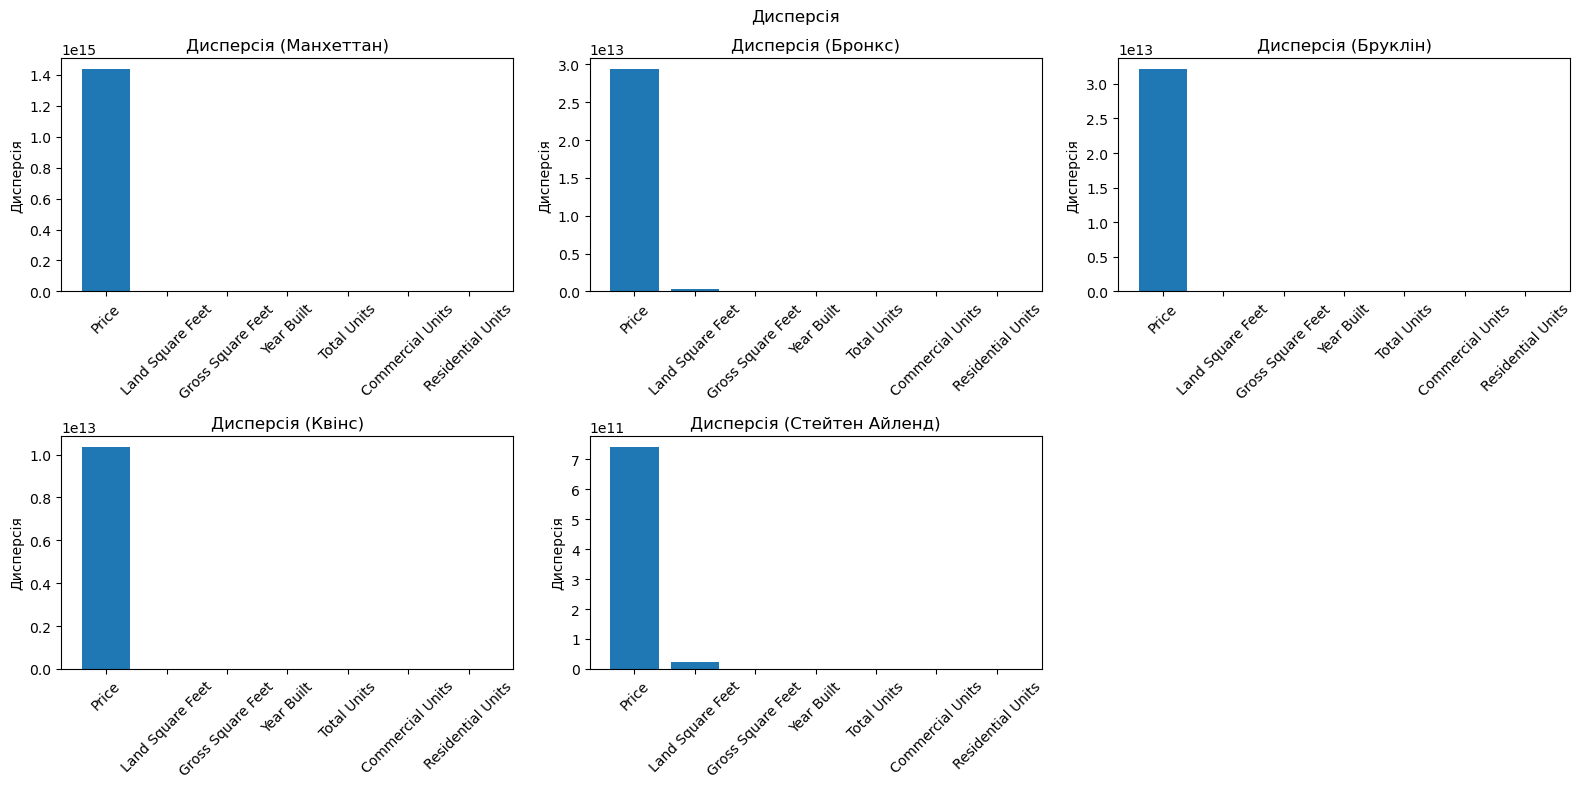

In [108]:
def get_variances_bar_charts(data):
    data_for_location = variance_df[variance_df['Location'] == data]
    plt.bar(data_for_location['Variable'], data_for_location['Variance'])
    plt.title(f'Дисперсія ({data})')
    plt.ylabel('Дисперсія')
    plt.xticks(rotation=45)

# Побудова графіків дисперсії
plt.figure(figsize=(16, 8))
locations = variance_df['Location'].unique()
j = 0
plt.suptitle(f'Дисперсія')
for i in range(231, 236):
    plt.subplot(i)
    get_variances_bar_charts(locations[j])
    j += 1

plt.tight_layout()
plt.show()

In [109]:
for i in range(0, len(locations)):
    var = variance_df[variance_df['Location'] == locations[i]]
    print(var)
    print('\n')

            Variable      Variance   Location
0              Price  1.434853e+15  Манхеттан
1   Land Square Feet  8.425939e+08  Манхеттан
2  Gross Square Feet  1.911267e+10  Манхеттан
3         Year Built  1.422353e+03  Манхеттан
4        Total Units  1.058250e+04  Манхеттан
5   Commercial Units  3.801828e+02  Манхеттан
6  Residential Units  1.034666e+04  Манхеттан


             Variable      Variance Location
7               Price  2.934372e+13   Бронкс
8    Land Square Feet  2.569412e+11   Бронкс
9   Gross Square Feet  1.450961e+10   Бронкс
10         Year Built  8.240287e+02   Бронкс
11        Total Units  5.831212e+02   Бронкс
12   Commercial Units  3.306125e+02   Бронкс
13  Residential Units  2.624638e+02   Бронкс


             Variable      Variance Location
14              Price  3.208616e+13  Бруклін
15   Land Square Feet  2.828762e+08  Бруклін
16  Gross Square Feet  1.996399e+09  Бруклін
17         Year Built  8.520290e+02  Бруклін
18        Total Units  1.835613e+03  Бруклі